In [1]:
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot; jtplot.style() 

In [3]:
# Exercise 1
# insert your code here

t_max = 150e-3   # second
dt = 1e-3        # second
tau = 20e-3      # second
el = -60e-3      # milivolt
vr = -70e-3      # milivolt
vth = -50e-3     # milivolt
r = 100e6        # ohm
i_mean = 25e-11  # ampere

print(t_max, dt, tau, el, vr, vth, r, i_mean)

0.15 0.001 0.02 -0.06 -0.07 -0.05 100000000.0 2.5e-10


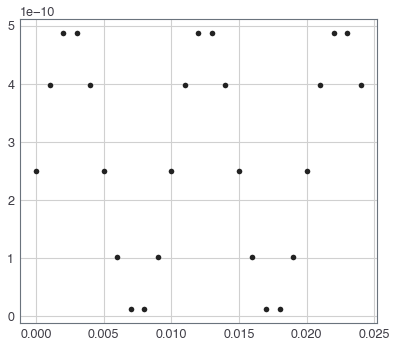

In [11]:
t = 0
step_end = 25
for step in range(step_end) : 
    t = step * dt
    it = i_mean * (1 + np.sin((2*np.pi / 0.01)*t))
    plt.plot(t, it, 'ko')
    
plt.show()

integrate
$$
\tau \dot{v} = E_l - v(t) + RI(t) \\
v(t + \Delta t) = v(t) + \Delta t \dot{v}
$$

<Figure size 460.8x403.2 with 0 Axes>

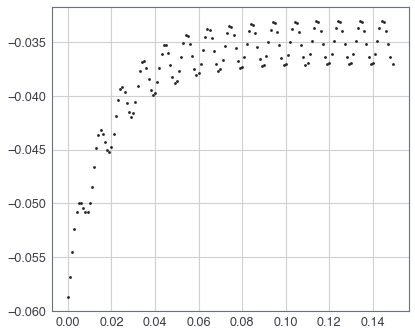

<Figure size 460.8x403.2 with 0 Axes>

In [16]:
t = 0
steps = int(t_max/dt)
v = el
vvec = []
plt.figure()
for step in range(steps) : 
    t = step*dt
    i_t = i_mean * (1 + np.sin((2*np.pi / 0.01)*t))
    v = v + dt*((el - v + r*i_t)/tau)
    vvec.append(v) 
    plt.plot(t, v, 'k.')
plt.figure() 

<Figure size 460.8x403.2 with 0 Axes>

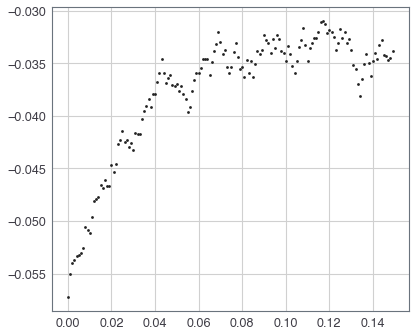

<Figure size 460.8x403.2 with 0 Axes>

In [18]:
np.random.seed(2020)
t = 0
steps = int(t_max/dt)
v = el
vvec = []
plt.figure()
for step in range(steps) : 
    t = step*dt
    i_t = i_mean * (1 + 0.1 * (np.sqrt(t_max/dt) * (np.random.random() * 2 - 1)))
    v = v + dt*((el - v + r*i_t)/tau)
    vvec.append(v) 
    plt.plot(t, v, 'k.')
plt.figure() 

<Figure size 460.8x403.2 with 0 Axes>

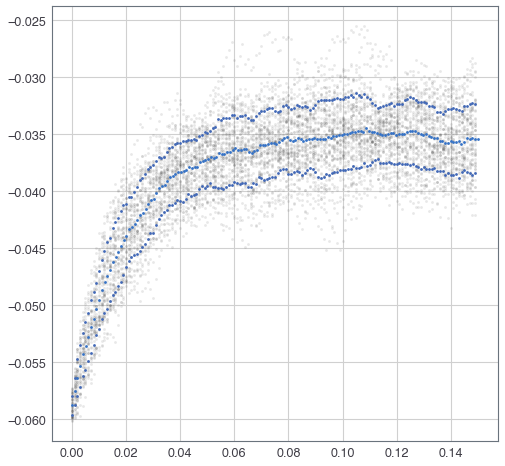

<Figure size 460.8x403.2 with 0 Axes>

In [56]:
np.random.seed(2020)
n = 50
t = np.zeros(n)
dt = dt * np.ones(n) 
steps = int(t_max/dt[0])
v_n = el * np.ones(n) 
v_m = np.zeros(steps)
plt.figure(figsize = (8, 8))
for step in range(steps) : 
    t = step*dt
    i_t = i_mean * (1 + 0.1 * (np.sqrt(t_max/dt) * (np.random.random(n) * 2 - 1)))
    v_n = v_n + dt*((el - v_n + r*i_t)/tau)
    v_m[step] = np.sum(v_n)/n
    
    v_var = [(v - v_m[step])**2 for v in v_n]
    v_var = np.sum(v_var) / (n - 1) 
    sd_t = np.sqrt(v_var)
    plt.plot(t, v_n, 'k.', alpha = 0.1)
    plt.plot(t[0], v_m[step] + sd_t, 'C7.', alpha = 1)
    plt.plot(t[0], v_m[step] - sd_t, 'C7.', alpha = 1)
    
    
    
plt.plot(np.linspace(0, .150, 150), v_m, 'b.', alpha = 1)
plt.figure() 

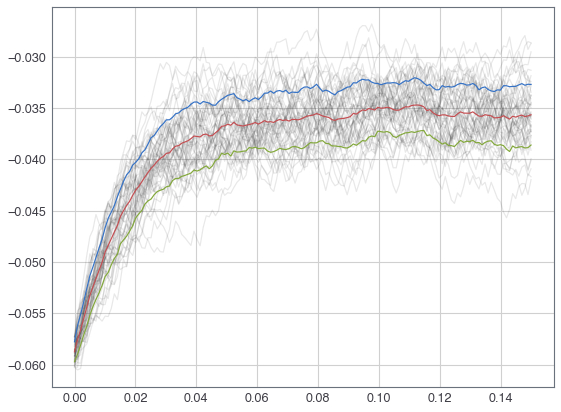

In [128]:
np.random.seed(2020) 
steps = int(t_max/dt)
t = np.linspace(0, t_max, steps)
n = 50
v_n = np.ones((n, steps)) * el
v_mu = np.zeros(steps) 
var_v = np.zeros(steps )
sd = np.zeros(steps)
syn = i_mean * (1 + 0.1 * (np.sqrt(t_max/dt) * (np.random.random((n, steps)) * 2 - 1)))
plt.figure(figsize =(9, 7))
for step in range(steps) :
   # if step == 0 : 
      #  continue
    v_n[:, step] = v_n[:, step - 1] + dt * ((el - v_n[:, step - 1] + r * syn[:, step]))/tau
    v_mu[step] = sum(v_n[:, step]) / n
    vrs = sum([(v - v_mu[step])**2 for v in v_n[:, step]]) 
    var_v[step] = vrs / (n - 1)
    sd[step] = np.sqrt(var_v[step])
plt.plot(t, v_n.T, 'k', alpha = 0.1)
plt.plot(t, v_mu + sd)
plt.plot(t, v_mu - sd)


plt.plot(t, v_mu)
plt.show() 

tutoirial two 

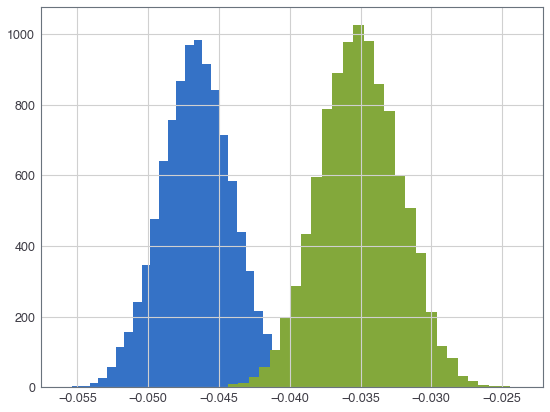

In [146]:
np.random.seed(2020) 
t = np.arange(0, t_max, dt)
steps = len(t)

n = 10000
v_n = np.ones([n, steps]) * el
syn = i_mean * (1 + 0.1 * (np.sqrt(t_max/dt) * (np.random.random([n, steps]) * 2 - 1)))
plt.figure(figsize =(9, 7))
for step, t in enumerate(t) :
    if step == 0 : 
        continue
    v_n[:, step] = v_n[:, step - 1] + dt * ((el - v_n[:, step - 1] + r * syn[:, step]))/tau
plt.hist(v_n[:, int(t_max/10/dt)], bins = 30) 
plt.hist(v_n[:, int(t_max/dt) - 1], bins = 30)
plt.show()

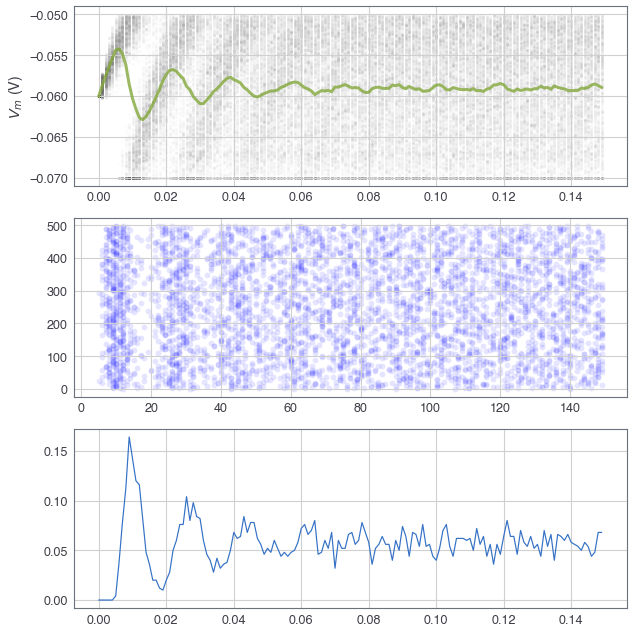

In [194]:
np.random.seed(2020) 
time = np.arange(0, t_max, dt)
steps = len(time)

n = 500
v_n = np.ones([n, steps]) * el
syn = i_mean * (1 + 0.1 * (np.sqrt(t_max/dt) * (np.random.random([n, steps]) * 2 - 1)))
spikes = {j : [] for j in range(n)}
spikes_n = np.zeros([steps])
thresh = -0.05
v_r = -0.07

fig = plt.figure(figsize = (9, 9)) 

for step, t in enumerate(time) :
    if step == 0 : 
        continue
    v_n[:, step] = v_n[:, step - 1] + dt * ((el - v_n[:, step - 1] + r * syn[:, step]))/tau
    
    for neuron in range(0, n) :
        if v_n[neuron, step] >= thresh :  
            spikes[neuron] += [step]
            v_n[neuron, step] = v_r
            spikes_n[step] += 1
            
v_mu = np.mean(v_n, axis = 0)
spikes_mu = spikes_n / n

ax1 = plt.subplot(3, 1, 1)
for j in range(n):
    plt.scatter(time, v_n[j], color="k", marker=".", alpha=0.01)
plt.plot(t_range, v_mu, 'C1', alpha=0.8, linewidth=3)
plt.ylabel('$V_m$ (V)')

ax2 = plt.subplot(3, 1, 2)
for j in range(0, n) : 
    times = spikes[j]
    height = np.ones(len(times)) * j
    plt.scatter(times, height, alpha = 0.1, color = 'blue')
    
plt.subplot(3, 1, 3, sharex = ax1) 
plt.plot(time, spikes_mu)

plt.tight_layout() 

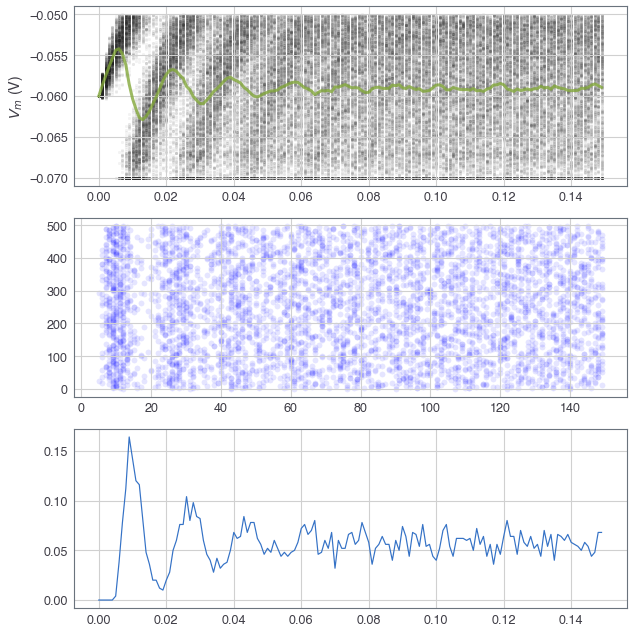

In [216]:
np.random.seed(2020) 
time = np.arange(0, t_max, dt)
steps = len(time)

n = 500
v_n = np.ones([n, steps]) * el
syn = i_mean * (1 + 0.1 * (np.sqrt(t_max/dt) * (np.random.random([n, steps]) * 2 - 1)))
spikes = {j : [] for j in range(n)}
spikes_n = np.zeros([steps])
thresh = -0.05
v_r = -0.07

fig = plt.figure(figsize = (9, 9)) 

for step, t in enumerate(time) :
    if step == 0 : 
        continue
    v_n[:, step] = v_n[:, step - 1] + dt * ((el - v_n[:, step - 1] + r * syn[:, step]))/tau
    
    spikey_guys = v_n[:, step] >= thresh
    v_n[spikey_guys, step] = v_r
    indexer = np.where(spikey_guys)[0]
    for i in indexer : 
        spikes[i] += [step] 
    
    spikes_n[step] =  len(indexer)
            
v_mu = np.mean(v_n, axis = 0)
spikes_mu = spikes_n / n

ax1 = plt.subplot(3, 1, 1)
for j in range(n):
    plt.scatter(time, v_n[j], color="k", marker=".", alpha=0.05)
plt.plot(t_range, v_mu, 'C1', alpha=0.8, linewidth=3)
plt.ylabel('$V_m$ (V)')

ax2 = plt.subplot(3, 1, 2)
for j in range(0, n) : 
    times = spikes[j]
    height = np.ones(len(times)) * j
    plt.scatter(times, height, alpha = 0.1, color = 'blue')
    
plt.subplot(3, 1, 3, sharex = ax1) 
plt.plot(time, spikes_mu)

plt.tight_layout() 

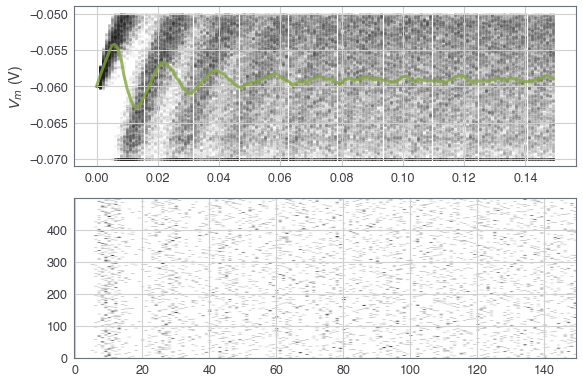

In [224]:
np.random.seed(2020) 
time = np.arange(0, t_max, dt)
steps = len(time)

n = 500
v_n = np.ones([n, steps]) * el
syn = i_mean * (1 + 0.1 * (np.sqrt(t_max/dt) * (np.random.random([n, steps]) * 2 - 1)))
spikes_n = np.zeros([steps])
thresh = -0.05
v_r = -0.07

raster = np.zeros([n, steps])

fig = plt.figure(figsize = (9, 10)) 

for step, t in enumerate(time) :
    if step == 0 : 
        continue
    v_n[:, step] = v_n[:, step - 1] + dt * ((el - v_n[:, step - 1] + r * syn[:, step]))/tau
    
    spikey_guys = (v_n[:, step] >= thresh) 
    v_n[spikey_guys, step] = v_r
    raster[spikey_guys, step] = 1.
    spikes_n[step] =len(indexer)
            
v_mu = np.mean(v_n, axis = 0)
spikes_mu = spikes_n / n

ax1 = plt.subplot(3, 1, 1)
for j in range(n):
    plt.scatter(time, v_n[j], color="k", marker=".", alpha=0.05)
plt.plot(t_range, v_mu, 'C1', alpha=0.8, linewidth=3)
plt.ylabel('$V_m$ (V)')

ax2= plt.subplot(3, 1, 2)
plt.imshow(raster, cmap = 'Greys', aspect = 'auto', origin = 'lower')

In [ ]:
np.random.seed(2020) 
time = np.arange(0, t_max, dt)
steps = len(time)

n = 500
v_n = np.ones([n, steps]) * el
syn = i_mean * (1 + 0.1 * (np.sqrt(t_max/dt) * (np.random.random([n, steps]) * 2 - 1)))
spikes_n = np.zeros([steps])
thresh = -0.05
v_r = -0.07

raster = np.zeros([n, steps])

fig = plt.figure(figsize = (9, 10)) 

for step, t in enumerate(time) :
    if step == 0 : 
        continue
    v_n[:, step] = v_n[:, step - 1] + dt * ((el - v_n[:, step - 1] + r * syn[:, step]))/tau
    spikey_guys = (v_n[:, step] >= thresh) 
    last_spike[spikey_guys] += 1
    clamped = 
    v_n[spikey_guys, step] = v_r
    raster[spikey_guys, step] = 1.
    spikes_n[step] =len(indexer)
            
v_mu = np.mean(v_n, axis = 0)
spikes_mu = spikes_n / n

ax1 = plt.subplot(3, 1, 1)
for j in range(n):
    plt.scatter(time, v_n[j], color="k", marker=".", alpha=0.05)
plt.plot(t_range, v_mu, 'C1', alpha=0.8, linewidth=3)
plt.ylabel('$V_m$ (V)')

ax2= plt.subplot(3, 1, 2)
plt.imshow(raster, cmap = 'Greys', aspect = 'auto', origin = 'lower')